<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Фильтрация-выбросов" data-toc-modified-id="Фильтрация-выбросов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Фильтрация выбросов</a></span></li><li><span><a href="#Изучение-зависимостей" data-toc-modified-id="Изучение-зависимостей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение зависимостей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [541]:
import pandas as pd


pd.set_option('display.float_format', '{:,.3f}'.format)

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.000",108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,nan,Санкт-Петербург,"18,863.000","16,028.000",1.000,482.000,2.000,755.000,nan
1,7,"3,350,000.000",40.400,2018-12-04T00:00:00,1,nan,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,"12,817.000","18,603.000",0.000,nan,0.000,nan,81.000
2,10,"5,196,000.000",56.000,2015-08-20T00:00:00,2,nan,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,"21,741.000","13,933.000",1.000,90.000,2.000,574.000,558.000
3,0,"64,900,000.000",159.000,2015-07-24T00:00:00,3,nan,14.000,nan,9,NaN,...,nan,0.000,Санкт-Петербург,"28,098.000","6,800.000",2.000,84.000,3.000,234.000,424.000
4,2,"10,000,000.000",100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,nan,Санкт-Петербург,"31,856.000","8,098.000",2.000,112.000,1.000,48.000,121.000
5,10,"2,890,000.000",30.400,2018-09-10T00:00:00,1,nan,12.000,14.400,5,NaN,...,9.100,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.000
6,6,"3,700,000.000",37.300,2017-11-02T00:00:00,1,nan,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,"52,996.000","19,143.000",0.000,nan,0.000,nan,155.000
7,5,"7,915,000.000",71.600,2019-04-18T00:00:00,2,nan,24.000,nan,22,NaN,...,18.900,2.000,Санкт-Петербург,"23,982.000","11,634.000",0.000,nan,0.000,nan,nan
8,20,"2,900,000.000",33.160,2018-05-23T00:00:00,1,nan,27.000,15.430,26,NaN,...,8.810,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.000
9,18,"5,400,000.000",61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,...,6.500,2.000,Санкт-Петербург,"50,898.000","15,008.000",0.000,nan,0.000,nan,289.000


In [542]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Нами был обработан файл `real_estate_data.csv`, по первым строкам фрейма, а так же общей информации о нём, можем отметить два важных факта:
- В фрейме много строк с пропусками в данных, которые необходимо обработать;
- Тип данных, в ряде столбцом следует изменить, для дальнейшей работы и оптимизации потребления памяти.

## Предобработка данных

Подробнее ознакомимся с пропусками в данных. Определим сколько всего пропусков в каждом столбце.

In [543]:
data.isna().mean()

total_images           0.000
last_price             0.000
total_area             0.000
first_day_exposition   0.000
rooms                  0.000
ceiling_height         0.388
floors_total           0.004
living_area            0.080
floor                  0.000
is_apartment           0.883
studio                 0.000
open_plan              0.000
kitchen_area           0.096
balcony                0.486
locality_name          0.002
airports_nearest       0.234
cityCenters_nearest    0.233
parks_around3000       0.233
parks_nearest          0.659
ponds_around3000       0.233
ponds_nearest          0.616
days_exposition        0.134
dtype: float64

Данные, о расстояниях, до чего либо, собирались в автоматическом режиме. Наличие пропуском в этих данных можно объяснить двумя причинами:

- пользователь указал не корректный адрес и система не смогла определить точное местоположение квартиры;
- ошибки при экспорте данных.

Пропусти в остальных данных с наибольшей долью вероятности связаны с человеческим фактором - люди при составление объявления или специально или случайно не указали эти параметры.

Для началал заполним пропуски в столбцах, где отстутствие данные в большой долью вероятно говорит об отсутствие объекта.
В нашем случае это столбцы `balcony`, `parks_around3000`, `ponds_around3000`.

In [544]:
data_v1 = data.copy(deep=True)
columns_NaN = ['balcony', 'parks_around3000', 'ponds_around3000']
for name in columns_NaN:
    data_v1[name] = data_v1[name].fillna(0)
data_v1['locality_name'] = data_v1['locality_name'].fillna('unknow')
data_v1.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропуски в столбце `ceiling_height`. Для этого сгруппируем данные по населённым пунктам, предположив, что внутри одного населнённого пункта разброс в соотношениях разных типов домов (в архитектуроном плане), а значит и квартир с разными высотами потолков, меньше, чем во всей выборке. Далее заполним пропуски в базовой таблице средними значениями для каждого населённого пункта.

In [545]:
data_ch = data_v1.copy(deep=True)
data_ch = data_ch.pivot_table(index='locality_name', values='ceiling_height', aggfunc='mean')
display(data_ch.sort_values(by='ceiling_height', ascending=False))

dict_ch = data_ch.to_dict('index')

ch_mean = data_ch['ceiling_height'].mean()

,ceiling_height
locality_name,
деревня Мины,27.000
деревня Нижняя,27.000
поселок Новый Свет,13.850
городской поселок Большая Ижора,4.663
Бокситогорск,3.900
...,...
посёлок Сапёрное,2.500
деревня Хязельки,2.500
село Копорье,2.475


In [546]:
def replace_ch(row):
    if row['ceiling_height'] == 'not':
        try:
            ch = dict_ch[row['locality_name']]['ceiling_height']
        except:
            ch = ch_mean
        row['ceiling_height'] = ch
    return row

data_v1['ceiling_height'] = data_v1['ceiling_height'].fillna('not')
data_v1 = data_v1.apply(replace_ch, axis=1)
display(data_v1.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.000",108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,0.000,Санкт-Петербург,"18,863.000","16,028.000",1.000,482.000,2.000,755.000,nan
1,7,"3,350,000.000",40.400,2018-12-04T00:00:00,1,2.644,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,"12,817.000","18,603.000",0.000,nan,0.000,nan,81.000
2,10,"5,196,000.000",56.000,2015-08-20T00:00:00,2,2.804,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,"21,741.000","13,933.000",1.000,90.000,2.000,574.000,558.000
3,0,"64,900,000.000",159.000,2015-07-24T00:00:00,3,2.804,14.000,nan,9,NaN,...,nan,0.000,Санкт-Петербург,"28,098.000","6,800.000",2.000,84.000,3.000,234.000,424.000
4,2,"10,000,000.000",100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,0.000,Санкт-Петербург,"31,856.000","8,098.000",2.000,112.000,1.000,48.000,121.000
5,10,"2,890,000.000",30.400,2018-09-10T00:00:00,1,2.618,12.000,14.400,5,NaN,...,9.100,0.000,городской посёлок Янино-1,nan,nan,0.000,nan,0.000,nan,55.000
6,6,"3,700,000.000",37.300,2017-11-02T00:00:00,1,2.630,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,"52,996.000","19,143.000",0.000,nan,0.000,nan,155.000
7,5,"7,915,000.000",71.600,2019-04-18T00:00:00,2,2.804,24.000,nan,22,NaN,...,18.900,2.000,Санкт-Петербург,"23,982.000","11,634.000",0.000,nan,0.000,nan,nan
8,20,"2,900,000.000",33.160,2018-05-23T00:00:00,1,2.939,27.000,15.430,26,NaN,...,8.810,0.000,посёлок Мурино,nan,nan,0.000,nan,0.000,nan,189.000
9,18,"5,400,000.000",61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,...,6.500,2.000,Санкт-Петербург,"50,898.000","15,008.000",0.000,nan,0.000,nan,289.000


Теперь заполним пропуски в стобцах `living_area` и `kitchen_area`. Воспользуемся той же логикой, что и в предидущем действие: внутри одного населенного пункта разброс соотношений жилой площади и кухни к общей площади меньше, чем во всей выборке. Так же сгруппируем данные по населённым пунктам, после чего в базовой таблице заполним пропуски средним значением.

In [547]:
data_la_ka = data_v1.copy(deep=True)
data_la_ka = data_la_ka.pivot_table(index='locality_name', values=['living_area', 'kitchen_area', 'total_area'], aggfunc='mean')
data_la_ka['percent_la'] = data_la_ka['living_area'] / data_la_ka['total_area']
data_la_ka['percent_ka'] = data_la_ka['kitchen_area'] / data_la_ka['total_area']
data_la_ka = data_la_ka.drop(columns=['kitchen_area', 'living_area', 'total_area'])

# создадим словарь из таблицы, использовав индекс как улючи
dict_la_ka = data_la_ka.to_dict('index')

# расситаем среднее значение по всем населённым пунктам
la_mean = data_la_ka['percent_la'].mean()
ka_mean = data_la_ka['percent_ka'].mean()

display(data_la_ka)

,percent_la,percent_ka
locality_name,,
unknow,0.561,0.178
Бокситогорск,0.664,0.144
Волосово,0.565,0.155
Волхов,0.643,0.149
Всеволожск,0.551,0.185
...,...,...
село Путилово,0.577,0.155
село Рождествено,0.505,0.163
село Русско-Высоцкое,0.522,0.215


In [548]:
def replace_area(row):
    # убедимся, что в строке есть пропущенные значения
    if row['living_area'] == 'not' or row['kitchen_area'] == 'not':
        area = row['total_area']
        locality = row['locality_name']
        # для каждого пропуска отдельно произведем операции
        if row['living_area'] == 'not':
            # найдём соотношение из кловаря, ключом будет населнный пункт для строки
            try:
                per_la = dict_la_ka[row['locality_name']]['percent_la']
            # есть НП, не попавшие словарь (у всех объявлений пропущены знач.), для них подставим среднее по всей выборке
            except:
                per_la = la_mean
            row['living_area'] = area * per_la
        if row['kitchen_area'] == 'not':
            try:
                per_ka = dict_la_ka[row['locality_name']]['percent_ka']
            except:
                per_ka = ka_mean
            row['kitchen_area'] = area * per_ka
    return row

# присвоим пропущенным значениям значение 'not', что бы можно было их опознать
data_v1['kitchen_area'] = data_v1['kitchen_area'].fillna('not')
data_v1['living_area'] = data_v1['living_area'].fillna('not')
# произведем пропущенных значений через метод .apply
data_v1 = data_v1.apply(replace_area, axis=1)
display(data_v1)
print(data_v1.isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.000",108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,0.000,Санкт-Петербург,"18,863.000","16,028.000",1.000,482.000,2.000,755.000,nan
1,7,"3,350,000.000",40.400,2018-12-04T00:00:00,1,2.644,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,"12,817.000","18,603.000",0.000,nan,0.000,nan,81.000
2,10,"5,196,000.000",56.000,2015-08-20T00:00:00,2,2.804,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,"21,741.000","13,933.000",1.000,90.000,2.000,574.000,558.000
3,0,"64,900,000.000",159.000,2015-07-24T00:00:00,3,2.804,14.000,90.755,9,NaN,...,27.394,0.000,Санкт-Петербург,"28,098.000","6,800.000",2.000,84.000,3.000,234.000,424.000
4,2,"10,000,000.000",100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,0.000,Санкт-Петербург,"31,856.000","8,098.000",2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.000",133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,NaN,...,13.830,0.000,Санкт-Петербург,"24,665.000","4,232.000",1.000,796.000,3.000,381.000,nan
23695,14,"3,100,000.000",59.000,2018-01-15T00:00:00,3,2.542,5.000,38.000,4,NaN,...,8.500,0.000,Тосно,nan,nan,0.000,nan,0.000,nan,45.000
23696,18,"2,500,000.000",56.700,2018-02-11T00:00:00,2,2.838,3.000,29.700,1,NaN,...,9.248,0.000,село Рождествено,nan,nan,0.000,nan,0.000,nan,nan
23697,13,"11,475,000.000",76.750,2017-03-28T00:00:00,2,3.000,17.000,43.808,12,NaN,...,23.300,2.000,Санкт-Петербург,"39,140.000","10,364.000",2.000,173.000,3.000,196.000,602.000


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                17
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area               19
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


Пропуски в столбце `floors_total` составляют менее 1%. Данные пропуски проигнорируем.

Далее проверим, можем ли мы заполнить пропуски в столбце `cityCenters_nearest` средним значением для каждого населенного пункта (столбец `locality_name`).
Для этого:
- добавим столбец `Nan_nearest`, в которое поместим булевое значение, есть ли в строке пропуск значения `cityCenters_nearest`;
- сгруппируем таблицу по столбцу `locality_name`, посчитаем для каждого населенного пункта каличество пропущенных значений и каличество заполненых значений, а так же среднее значением для столбца `cityCenters_nearest`;
- добавим к таблице столбец `Nan_percent` в котором рассчитаем процент пропущенных значений;
- рассмотрим количество населённых пунктов с процентом пропусков до и от 50.

In [549]:
nearect_city = data_v1.copy(deep=True)
nearect_city['Nan_nearest'] = nearect_city['cityCenters_nearest'].isna()
display(nearect_city.head())
#nearect_city = nearect_city.dropna(subset=['cityCenters_nearest'])
nearect_city = (nearect_city
                .pivot_table(index='locality_name',
                             values=['cityCenters_nearest', 'Nan_nearest'],
                             aggfunc={'Nan_nearest': ['sum'], 'cityCenters_nearest': ['mean', 'count']}))
nearect_city.columns = ['sum_Nan', 'count','mean']
nearect_city['mean'] = nearect_city['mean'].round(0)
nearect_city['Nan_percent'] = ((nearect_city['sum_Nan'] / (nearect_city['count']+nearect_city['sum_Nan'])) * 100).round(2)
display(nearect_city.head())
print('Количество населённых пунктов с пропусками от 50%:', nearect_city.query("Nan_percent > 50").shape[0])
print('Количество населённых пунктов с пропусками до 50%:', nearect_city.query("Nan_percent < 50").shape[0])


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,Nan_nearest
0,20,"13,000,000.000",108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,0.000,Санкт-Петербург,"18,863.000","16,028.000",1.000,482.000,2.000,755.000,nan,False
1,7,"3,350,000.000",40.400,2018-12-04T00:00:00,1,2.644,11.000,18.600,1,NaN,...,2.000,посёлок Шушары,"12,817.000","18,603.000",0.000,nan,0.000,nan,81.000,False
2,10,"5,196,000.000",56.000,2015-08-20T00:00:00,2,2.804,5.000,34.300,4,NaN,...,0.000,Санкт-Петербург,"21,741.000","13,933.000",1.000,90.000,2.000,574.000,558.000,False
3,0,"64,900,000.000",159.000,2015-07-24T00:00:00,3,2.804,14.000,90.755,9,NaN,...,0.000,Санкт-Петербург,"28,098.000","6,800.000",2.000,84.000,3.000,234.000,424.000,False
4,2,"10,000,000.000",100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,0.000,Санкт-Петербург,"31,856.000","8,098.000",2.000,112.000,1.000,48.000,121.000,False


,sum_Nan,count,mean,Nan_percent
locality_name,,,,
unknow,8.000,41,"11,279.000",16.330
Бокситогорск,16.000,0,nan,100.000
Волосово,36.000,0,nan,100.000
Волхов,111.000,0,nan,100.000
Всеволожск,398.000,0,nan,100.000


Количество населённых пунктов с пропусками от 50%: 338
Количество населённых пунктов с пропусками до 50%: 27


Из полученных результатов видно, что по большинству пунктов количество объявлений с пропустом значений в `cityCenters_nearest` составляет более 50%. В такой ситуации замена пропущенных значений на стреднее сильно исказит результаты для этих населённых пунктов. Из-за этого, принимаем решением пропуски не трогать.

Далее, преобразуем типы данных, для столбцов `balcony`, `last_price`, `parks_around3000`, `ponds_around3000`, `is_apartment`, `first_day_exposition`.
Столбцы `balcony`, `last_price`, `parks_around3000`, `ponds_around3000` приведём к типу `int64`. Это допустимо ввиду малой погрешности, которая образуется из-за округления дробной части.
Столбец `is_apartment` к булевому типу.
Столбец `first_day_exposition` к типу datatime.
Остальные столбцы или уже имеют оптимальный тип данных или же для их приведения к нему необходимо избавится от пропусков, что в данный момент не рационально.

In [550]:
columns_to_int = [
    'balcony',
    'last_price',
    'parks_around3000',
    'ponds_around3000',
]
for column in columns_to_int:
    data_v1[column] = data_v1[column].round(0).astype('int64')
data_v1['is_apartment'] = data_v1['is_apartment'].astype('bool')
data_v1['first_day_exposition'] = pd.to_datetime(data_v1['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23682 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23680 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

### Вывод

В ходе предварительной обработки данных были заполнены пропуски в столбцах: `balcony`, `parks_around3000`, `ponds_around3000` и `is_apartment`.
Так же был изменены типы данных в столбцах: `balcony`, `last_price`, `parks_around3000`, `ponds_around3000`, `is_apartment`, `first_day_exposition`.

## Расчёты и добавление результатов в таблицу

Произведем для каждой строки рассчёт:
- цены за квадратный метр;
- доли жилой площади;
- доли площади кухни;

Для удобства отображения округлим цену за квадратный метр до целой части, доли площадей до 2-х цифр после точки.

In [551]:
data_v2 = data_v1.copy(deep=True)
data_v2['price_for_meter'] = data_v2['last_price'] / data_v2['total_area']
data_v2['price_for_meter'] = data_v2['price_for_meter'].astype('int')
data_v2['living_for_total'] = (data_v2['living_area'] / data_v2['total_area']).round(2)
data_v2['kitchen_for_total'] = (data_v2['kitchen_area'] / data_v2['total_area']).round(2)
data_v2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,living_for_total,kitchen_for_total
0,20,13000000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,"18,863.000","16,028.000",1,482.000,2,755.000,nan,120370,0.470,0.230
1,7,3350000,40.400,2018-12-04,1,2.644,11.000,18.600,1,True,...,"12,817.000","18,603.000",0,nan,0,nan,81.000,82920,0.460,0.270
2,10,5196000,56.000,2015-08-20,2,2.804,5.000,34.300,4,True,...,"21,741.000","13,933.000",1,90.000,2,574.000,558.000,92785,0.610,0.150
3,0,64900000,159.000,2015-07-24,3,2.804,14.000,90.755,9,True,...,"28,098.000","6,800.000",2,84.000,3,234.000,424.000,408176,0.570,0.170
4,2,10000000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,"31,856.000","8,098.000",2,112.000,1,48.000,121.000,100000,0.320,0.410
5,10,2890000,30.400,2018-09-10,1,2.618,12.000,14.400,5,True,...,nan,nan,0,nan,0,nan,55.000,95065,0.470,0.300
6,6,3700000,37.300,2017-11-02,1,2.630,26.000,10.600,6,True,...,"52,996.000","19,143.000",0,nan,0,nan,155.000,99195,0.280,0.390
7,5,7915000,71.600,2019-04-18,2,2.804,24.000,40.868,22,True,...,"23,982.000","11,634.000",0,nan,0,nan,nan,110544,0.570,0.260
8,20,2900000,33.160,2018-05-23,1,2.939,27.000,15.430,26,True,...,nan,nan,0,nan,0,nan,189.000,87454,0.470,0.270
9,18,5400000,61.000,2017-02-26,3,2.500,9.000,43.600,7,True,...,"50,898.000","15,008.000",0,nan,0,nan,289.000,88524,0.710,0.110


Далее, добавим столбцы, в которые внесём день недели, месяц и год создания объявления о продаже.

In [552]:
data_v2['weekday'] = data_v2['first_day_exposition'].dt.weekday
data_v2['month'] = data_v2['first_day_exposition'].dt.month
data_v2['years'] = data_v2['first_day_exposition'].dt.year
data_v2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,living_for_total,kitchen_for_total,weekday,month,years
0,20,13000000,108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,482.000,2,755.000,nan,120370,0.470,0.230,3,3,2019
1,7,3350000,40.400,2018-12-04,1,2.644,11.000,18.600,1,True,...,nan,0,nan,81.000,82920,0.460,0.270,1,12,2018
2,10,5196000,56.000,2015-08-20,2,2.804,5.000,34.300,4,True,...,90.000,2,574.000,558.000,92785,0.610,0.150,3,8,2015
3,0,64900000,159.000,2015-07-24,3,2.804,14.000,90.755,9,True,...,84.000,3,234.000,424.000,408176,0.570,0.170,4,7,2015
4,2,10000000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,112.000,1,48.000,121.000,100000,0.320,0.410,1,6,2018
5,10,2890000,30.400,2018-09-10,1,2.618,12.000,14.400,5,True,...,nan,0,nan,55.000,95065,0.470,0.300,0,9,2018
6,6,3700000,37.300,2017-11-02,1,2.630,26.000,10.600,6,True,...,nan,0,nan,155.000,99195,0.280,0.390,3,11,2017
7,5,7915000,71.600,2019-04-18,2,2.804,24.000,40.868,22,True,...,nan,0,nan,nan,110544,0.570,0.260,3,4,2019
8,20,2900000,33.160,2018-05-23,1,2.939,27.000,15.430,26,True,...,nan,0,nan,189.000,87454,0.470,0.270,2,5,2018
9,18,5400000,61.000,2017-02-26,3,2.500,9.000,43.600,7,True,...,nan,0,nan,289.000,88524,0.710,0.110,6,2,2017


В конце, произведем категоризацию данных об этаже квартиры. Для первого этажа пропишем цифру *0*, для последнего *2*, любой другой этаж пропишем как *1*.

In [553]:
def type_floor(row):
    if row['floor'] == 1:
        return 0
    elif row['floor'] == row['floors_total']:
        return 2
    else:
        return 1

data_v2['type_floor'] = data_v2.apply(type_floor, axis=1)
display(data_v2['type_floor'].value_counts())

1    17446
2     3336
0     2917
Name: type_floor, dtype: int64

## Исследовательский анализ данных

Построим гистограмму по количеству комнат в квартире, так же получим числовое описание данных.

count   23,699.000
mean         2.071
std          1.078
min          0.000
25%          1.000
50%          2.000
75%          3.000
max         19.000
Name: rooms, dtype: float64

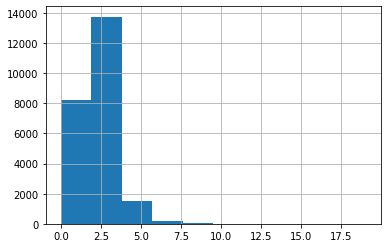

In [554]:
rooms_all = data_v2['rooms'].describe()
display(rooms_all)
data_v2['rooms'].hist()

Уберем выбросы и внесем дополнительные параметры отображения гистограммы.

Число квартир с менее чем 1 комнатой: 197
Число квартир с более чем 5 комнатами: 195


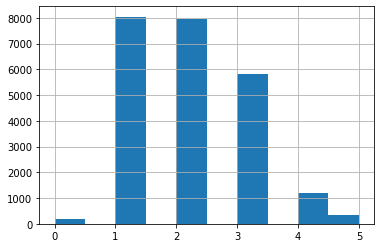

In [555]:
print("Число квартир с менее чем 1 комнатой:", data_v2.query('rooms < 1')['last_price'].count())
print("Число квартир с более чем 5 комнатами:", data_v2.query('rooms > 5')['last_price'].count())
display(data_v2['rooms'].hist(bins=10, range=(0, 5)))

Из гистограммы видно, что в наибольшем количестве объявлений, квартиры имеют 1-2 комнаты. Третий, по полулярности вариант - квартира с 3-ми комнатами. 

Далее изучим описание данный для высоты потолков. А так же построим гистограмму.

count   23,699.000
mean         2.772
std          1.009
min          1.000
25%          2.600
50%          2.725
75%          2.804
max        100.000
Name: ceiling_height, dtype: float64

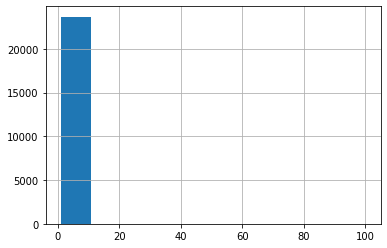

In [556]:
height_all = data_v2['ceiling_height'].describe()
display(height_all)
display(data_v2['ceiling_height'].hist())

Отбросим странный данные (выбросы) и уточним параметры выведения гистограммы.

Число квартир с потолками ниже 2.5 м: 75
Число квартир с потолками выше 3.5 м: 326


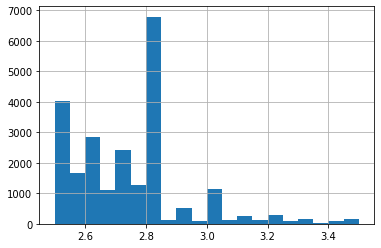

In [557]:
print("Число квартир с потолками ниже 2.5 м:", data_v2.query('ceiling_height < 2.5')['last_price'].count())
print("Число квартир с потолками выше 3.5 м:", data_v2.query('ceiling_height > 3.5')['last_price'].count())
display(data_v2['ceiling_height'].hist(bins=20, range=(2.5,3.5)))

По гистограмме выдно, что достаточно стандартной высотой потолка является диапазон 2.8-2.85 м. Есть всплески для высот 2.5-2.55, 2.6-2.65 и 2.7-2.75. На первый взгляд, анамально выглядит пик для высот 3-3.05 м. Однако это может объсняться большим количество квартив в домах старой постройки, которые в Санк-Петербурге много.

Следующими, изучим данные для общей площади квартир.

count   23,699.000
mean        60.349
std         35.654
min         12.000
25%         40.000
50%         52.000
75%         69.900
max        900.000
Name: total_area, dtype: float64

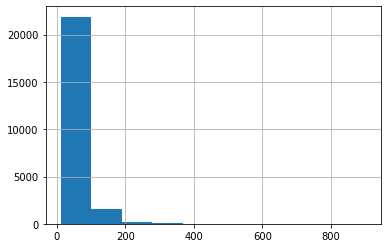

In [558]:
area_all = data_v2['total_area'].describe()
display(area_all)
display(data_v2['total_area'].hist())

Уберем выбросы и задамим шаг гистограммы 10 кв.м.

Число квартир с площадью менее 20 кв.м: 27
Число квартир с площадью более 170 кв.м: 369


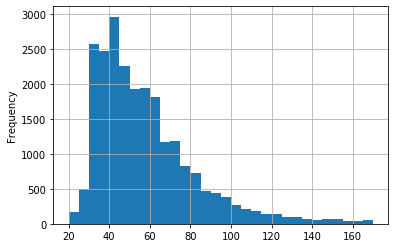

In [559]:
print("Число квартир с площадью менее 20 кв.м:", data_v2.query('total_area < 20')['last_price'].count())
print("Число квартир с площадью более 170 кв.м:", data_v2.query('total_area > 170')['last_price'].count())
all_total_area = data_v2['total_area'].plot(kind='hist', bins=30, range=(20,170), grid=True, label='all')
display(all_total_area)

Тут видим очень правдоподобные данные, пиковое количество квартир приходится на диапазон 40-45 кв.м, после чего идёт достаточно плавная обратная зависимости числа объявлений от площади.

Далее расмотрим данные по ценам за квартиры.

count        23,699.000
mean      6,541,548.772
std      10,887,013.268
min          12,190.000
25%       3,400,000.000
50%       4,650,000.000
75%       6,800,000.000
max     763,000,000.000
Name: last_price, dtype: float64

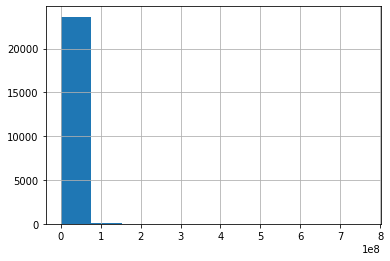

In [560]:
display(data_v2['last_price'].describe())
display(data_v2['last_price'].hist())

Уберем выбросы и зададим шаг 1 млн.

Число квартир с ценой менее 1 млн: 225
Число квартис ценой более 31 млн: 307


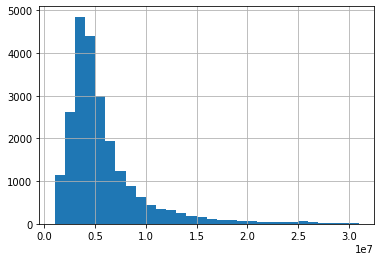

In [561]:
print("Число квартир с ценой менее 1 млн:", data_v2.query('last_price < 1000000')['total_area'].count())
print("Число квартис ценой более 31 млн:", data_v2.query('last_price > 31000000')['total_area'].count())
display(data_v2['last_price'].hist(bins=30, range=(1000000,31000000)))

Полученная гистограмма так же максимально правдоподобна. Наибольшее количество объявлений попадает в диапазоны: 3-4 и 4-5 млн.

Отдельно рассмотрим цену за квадратный метр.

count      23,699.000
mean       99,421.210
std        50,306.808
min           111.000
25%        76,585.000
50%        95,000.000
75%       114,256.000
max     1,907,500.000
Name: price_for_meter, dtype: float64

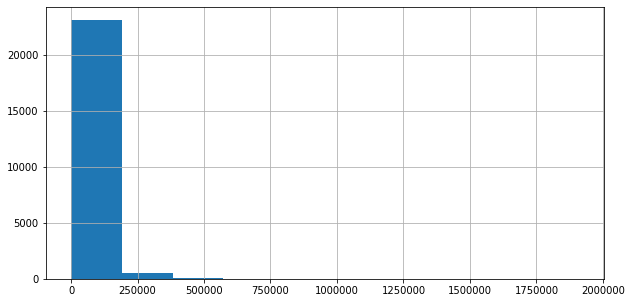

In [562]:
pfm_all = data_v2['price_for_meter'].describe()
display(pfm_all)
display(data_v2['price_for_meter'].hist(figsize=(10,5)))

Число квартир с ценой менее 10 000 за кв.м: 3
Число квартис ценой более 210 000 за кв.м: 448


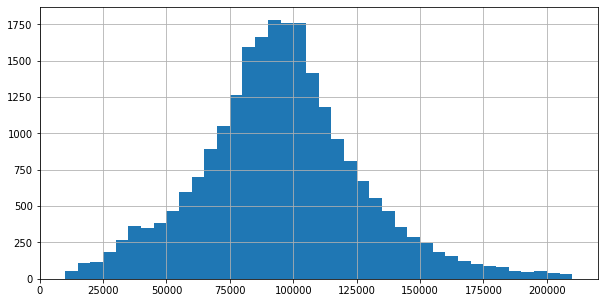

In [563]:
print("Число квартир с ценой менее 10 000 за кв.м:", data_v2.query('price_for_meter < 10000')['total_area'].count())
print("Число квартис ценой более 210 000 за кв.м:", data_v2.query('price_for_meter > 210000')['total_area'].count())
display(data_v2['price_for_meter'].hist(bins=40, range=(10000,210000), figsize=(10,5)))

По гистограмме видно, что цена за квадратный метр полность соответствует графику нормального распределения.

Далее расмотрим количество дней, которое объявление было активно.

count   20,518.000
mean       180.889
std        219.728
min          1.000
25%         45.000
50%         95.000
75%        232.000
max      1,580.000
Name: days_exposition, dtype: float64

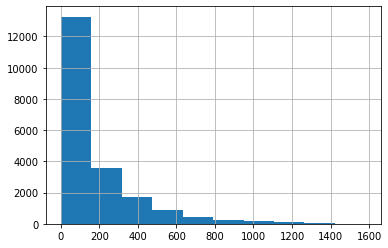

In [564]:
display(data_v2['days_exposition'].describe())
display(data_v2['days_exposition'].hist())

Число квартир проданных более чем за 800 дней: 591


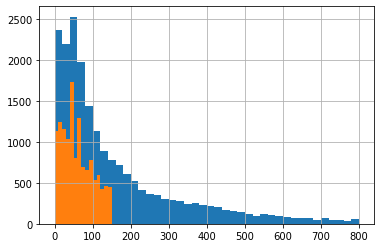

In [565]:
print("Число квартир проданных более чем за 800 дней:", data_v2.query('days_exposition > 800')['total_area'].count())
display(data_v2['days_exposition'].hist(bins=40, range=(0,800)))

# для ответа на комментарий
display(data_v2['days_exposition'].hist(bins=15, range=(0,150)))

Для ответа на вопрос: "С какого момента считать, что квартира продается долго?", можно использовать три показателя: медиану, среднее время продажи и третий квартиль. В данном случае, считаю, что логичнее использовать Q3, следовательно, **продажу квартиры можно считать долгой если она продается более 232 дней.**

### Фильтрация выбросов

В ходе ознакомления с каждым их параметров, для каждого параметра в отдельности были определены граничные рамки, за пределами которых мы считаем, что данные являются выбросами. Создамим новый фрейм отфильтровав данные выборосы.

In [566]:
data_v3 = data_v2.copy(deep=True)
data_v3 = data_v3.query('rooms >= 1 and rooms <= 5')
data_v3 = data_v3.query('ceiling_height >= 2.5 and ceiling_height <= 3.5')
data_v3 = data_v3.query('total_area >= 20 and total_area <= 170')
data_v3 = data_v3.query('last_price >= 1000000 and last_price <= 31000000')
data_v3 = data_v3.query('price_for_meter >= 10000 and price_for_meter <= 210000')
data_v3 = data_v3.query('days_exposition <= 800')
data_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18784 entries, 1 to 23697
Data columns (total 29 columns):
total_images            18784 non-null int64
last_price              18784 non-null int64
total_area              18784 non-null float64
first_day_exposition    18784 non-null datetime64[ns]
rooms                   18784 non-null int64
ceiling_height          18784 non-null float64
floors_total            18714 non-null float64
living_area             18776 non-null float64
floor                   18784 non-null int64
is_apartment            18784 non-null bool
studio                  18784 non-null bool
open_plan               18784 non-null bool
kitchen_area            18774 non-null float64
balcony                 18784 non-null int64
locality_name           18784 non-null object
airports_nearest        14535 non-null float64
cityCenters_nearest     14554 non-null float64
parks_around3000        18784 non-null int64
parks_nearest           6148 non-null float64
ponds_around30

Далее, изучим зависимость цены от ряда факторов. Для начала убедимся, что есть четкая корреляция, между ценой и общей площадью квартиры. Если она будет обнаружена, далее будет рассматривать зависимость цены за квадратный метр от других параметров. Это позволит нивелировать разброс по площадам квартир.

### Изучение зависимостей

0.7934315899760436


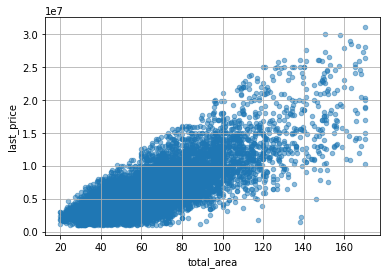

In [567]:
data_v3.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.5)
corr_price_all = data_v3['last_price'].corr(data_v3['total_area'])
print(corr_price_all)

И числовой рассчет, и диаграмма рассеивания показывают, что есть четкая положительная корреляция между ценой и общей площадью. Поэтому далее будем использовать цену за квадратный метр, вместо последней цены в обявлении.

Рассмотрим зависимость цены за метр от количества дней в продаже.

0.029101575652880005


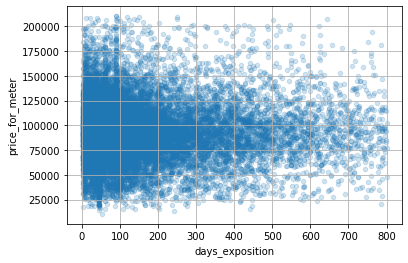

In [568]:
data_v3.plot(x='days_exposition', y='price_for_meter', kind='scatter', grid=True, alpha=0.2)
print(data_days_exp['price_for_meter'].corr(data_days_exp['days_exposition']))

Как таковой, корреляции между этими параметрами, ни в числовом выражении, ни на графике не видно. Однако, имеется два странных пика, примерно на значениеях 40-50 дней и 85-95 дней. На первом из них количество проданных квартир, с ценой за метр ниже среднего резко увеличивается, на втором, это происходит для квартир, с ценой за метр выше среднего.

Теперь изучим зависимость цены за метр от количества комнат, типа этажа и расстояния от центра.

18784
rooms -0.12292847758938118
type_floor 0.05274822807992271
cityCenters_nearest -0.40622259769022206


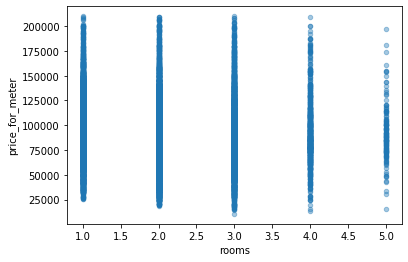

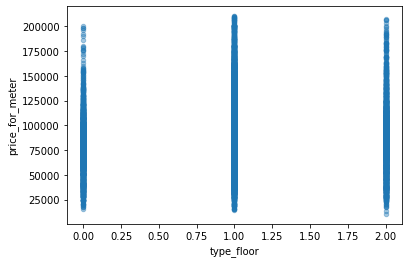

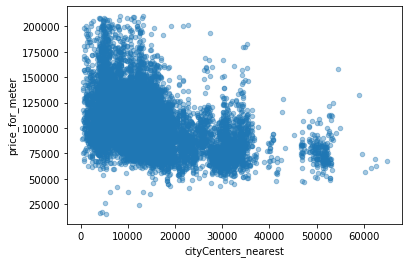

In [569]:
data_for_price = data_v3[[
    'last_price',
    'rooms',
    'total_area',
    'type_floor',
    'cityCenters_nearest',
    'weekday',
    'month',
    'years',
    'locality_name',
    'price_for_meter'
]]
columns = ['rooms',
    'type_floor',
    'cityCenters_nearest']
#data_for_price = data_for_price.query('last_price > 1000000 and rooms < 5 and total_area < 170')
print(data_for_price.shape[0])
for column in columns:
    data_for_price.plot(x=column, y='price_for_meter', kind='scatter', alpha=0.4)
    print(column, data_for_price['price_for_meter'].corr(data_for_price[column]))

Как видно из числовых значений и графиков, зависимость цены за метр от количества комнат явно не прослеживается, такая же ситуация с типом этажа. А вот с расстоянием от центра ситуация другая, видна четкая зависимость падения цены за метр при отдалении от центра.

Отдельно стоит обратить внимание на аномальную пустоту на графике зависимости цены от удаленности от центра в промежутке ~ 35-45 км. Скорее всеге, на расстояние в 35 км от центра оканчивается городская агломерация Питера, и плотность жилых построет резко падает. А на расстояние 45 км, скорее всего имеется несколько крупных населённых пунктов.

Изучим зависимость средней цены за квадратный метр от месяца, дня недели и года, в котором было опубликовано объявление.

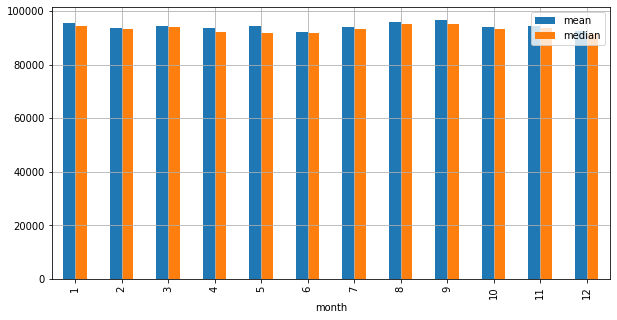

In [570]:
data_for_price_m = data_for_price.pivot_table(index='month', values='price_for_meter', aggfunc=['mean','median'])
data_for_price_m.columns = ['mean', 'median']
data_for_price_m['mean'] = data_for_price_m['mean'].round(0).astype('int')
data_for_price_m['median'] = data_for_price_m['median'].round(0).astype('int')
data_for_price_m.plot(y=['mean', 'median'], grid=True, kind='bar', figsize=(10,5))

Заметен некоторый спад удельной цена в 5 и 6 месяце.

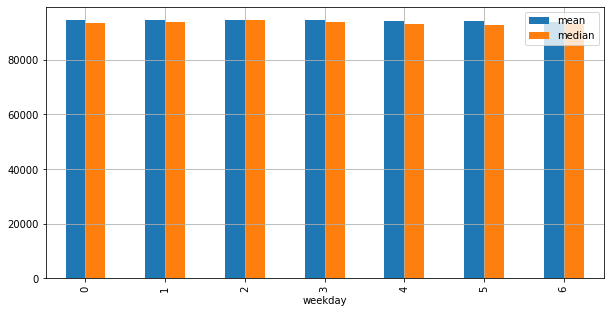

In [571]:
data_for_price_w = data_for_price.pivot_table(index='weekday', values='price_for_meter', aggfunc=['mean','median'])
data_for_price_w.columns = ['mean', 'median']
data_for_price_w['mean'] = data_for_price_w['mean'].round(0).astype('int')
data_for_price_w['median'] = data_for_price_w['median'].round(0).astype('int')
data_for_price_w.plot(y=['mean', 'median'], grid=True, kind='bar', figsize=(10,5))

Заметных изменений средней удельный цены нет.

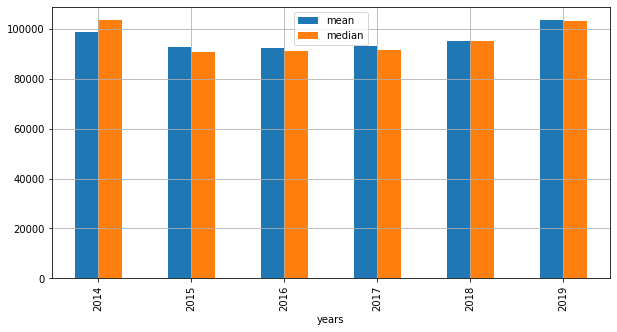

In [572]:
data_for_price_y = data_for_price.pivot_table(index='years', values='price_for_meter', aggfunc=['mean','median'])
data_for_price_y.columns = ['mean', 'median']
data_for_price_y['mean'] = data_for_price_y['mean'].round(0).astype('int')
data_for_price_y['median'] = data_for_price_y['median'].round(0).astype('int')
data_for_price_y.plot(y=['mean', 'median'], grid=True, kind='bar', figsize=(10,5))

Видно, что средняя удельна цена с 2014 по 2017 год падала, после чего стала снова расти. Это можно связать с внешнеми факторами.

Теперь, создадим сводную таблицу по населённым пунктам в выборке. Найдём населённые пункты с наибольшей и наименьшей средней и медианной ценой за квадратный метр.

In [573]:
data_p = data_v3.pivot_table(index='locality_name', values='price_for_meter', aggfunc=['median', 'mean','count'])
data_p.columns = ['median', 'mean', 'count']
data_p['mean'] = data_p['mean'].round(0)
data_p = data_p.sort_values(by='count', ascending=False)
data_p = data_p[:10]
display(data_p)
display(data_p.sort_values(by='mean', ascending=False).head(1))
display(data_p.sort_values(by='mean', ascending=True).head(1))
display(data_p.sort_values(by='median', ascending=False).head(1))
display(data_p.sort_values(by='median', ascending=True).head(1))

,median,mean,count
locality_name,,,
Санкт-Петербург,"102,130.500","106,543.000",12424
посёлок Мурино,"84,726.000","85,292.000",477
посёлок Шушары,"75,933.000","77,582.000",396
Всеволожск,"65,613.000","66,753.000",322
Колпино,"73,820.500","74,711.000",302
посёлок Парголово,"91,428.000","89,705.000",291
Пушкин,"97,607.500","100,554.000",282
деревня Кудрово,"91,428.000","92,303.000",275
Гатчина,"67,647.000","68,334.000",257


,median,mean,count
locality_name,,,
Санкт-Петербург,"102,130.500","106,543.000",12424


,median,mean,count
locality_name,,,
Выборг,"57,352.000","57,749.000",191


,median,mean,count
locality_name,,,
Санкт-Петербург,"102,130.500","106,543.000",12424


,median,mean,count
locality_name,,,
Выборг,"57,352.000","57,749.000",191


Вполне ожидаемо, самая высакая средняя и медианная удельная цена в Санкт-Петербурге.

Далее, создадим выборку с квартирами только в Санкт-Петербурге. После чего, переведем расстояние до центра из метров в километры, после чего создадим сводную таблицу, относительно расстония до центра и вычислим среднюю и медианную удельные цены.

In [574]:
data_spb = data_v3.query('locality_name == "Санкт-Петербург"')
data_spb = data_spb.dropna(subset=['cityCenters_nearest'])
data_spb['kilometer_to_centre'] = (data_spb['cityCenters_nearest'] / 1000).round(0).astype('int')
data_spb_good = data_spb.pivot_table(index='kilometer_to_centre', values='price_for_meter' , aggfunc=['mean','count','median'])
data_spb_good.columns = ['mean', 'count', 'median']
data_spb_good['mean'] = data_spb_good['mean'].astype('int')
data_spb_good['median'] = data_spb_good['median'].astype('int')
display(data_spb_good.head(10))

,mean,count,median
kilometer_to_centre,,,
0,110557,8,104081
1,122407,109,115789
2,117086,167,115034
3,110423,216,104919
4,118252,443,112500
5,125389,586,122576
6,124628,404,119828
7,119760,279,115231
8,120183,469,118364


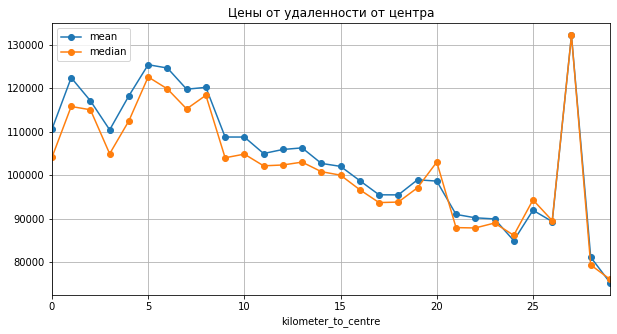

In [575]:
data_spb_good.plot(y=['mean','median'], grid=True, title='Цены от удаленности от центра', figsize=(10,5), style='o-')

На графике видны три пика. Пик в районе 26-28 км следует рассматривать отдельно, так как он не относится к теме работы.

Пик в районе 0 км абсолютно логичем, квартиры прямо в центре города всегда имеют наибольшуя удельную цену. Далее видно резкое падение цены и новый пик, который приходится на 7-8 км. После 8 км характер шрафика меняется - удельная цена начинает постепенно падать, по мере отталения от центра. Поэтому границу в 8 км и будем считать центром города.

Мы определили границу центра, теперь проведем исследование зависимости цены квартиры от разных параметров.
Для начала, созданим новый фрейм, в который отберем только квартиры в центре.

In [576]:
data_spb_centre = data_spb.query('kilometer_to_centre <= 8')
print("Строк в выборке:", data_spb_centre.shape[0])
display(data_spb_centre.head(15))


Строк в выборке: 2681


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_meter,living_for_total,kitchen_for_total,weekday,month,years,type_floor,kilometer_to_centre
4,2,10000000,100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,48.000,121.000,100000,0.320,0.410,1,6,2018,1,8
24,8,6500000,97.200,2015-10-31,2,2.804,3.000,46.500,1,True,...,124.000,265.000,66872,0.480,0.200,5,10,2015,0,2
35,6,15500000,149.000,2017-06-26,5,2.804,5.000,104.000,4,True,...,779.000,644.000,104026,0.700,0.110,0,6,2017,1,4
61,18,7990000,74.000,2017-08-24,2,2.804,4.000,43.000,4,True,...,nan,609.000,107972,0.580,0.270,3,8,2017,2,4
63,2,20000000,118.000,2018-09-11,3,3.000,9.000,68.000,7,True,...,779.000,37.000,169491,0.580,0.140,1,9,2018,1,5
70,9,3400000,30.000,2018-09-05,1,2.804,5.000,16.000,1,True,...,nan,14.000,113333,0.530,0.230,2,9,2018,0,8
94,3,3500000,29.500,2019-04-26,1,2.500,5.000,15.600,2,True,...,nan,4.000,118644,0.530,0.190,4,4,2019,1,7
99,32,9600000,90.000,2017-09-26,4,2.804,5.000,67.000,2,True,...,nan,104.000,106666,0.740,0.090,1,9,2017,1,3
106,9,10500000,124.100,2017-05-25,5,3.200,4.000,79.400,3,True,...,nan,6.000,84609,0.640,0.160,3,5,2017,1,6
111,4,4590000,40.000,2017-05-29,1,2.804,6.000,18.000,1,True,...,nan,31.000,114750,0.450,0.250,0,5,2017,0,6


Посмотрим на распределение количества объявлений про площади квартир.

count   2,681.000
mean       73.239
std        29.794
min        20.000
25%        49.350
50%        68.720
75%        90.300
max       170.000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


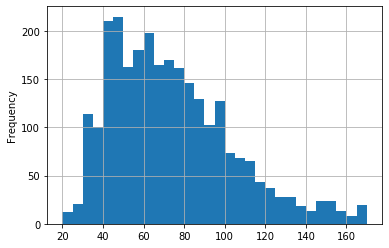

In [577]:
area_spb = data_spb_centre['total_area'].describe()
print(data_spb_centre['total_area'].describe())
print(data_spb_centre['total_area'].plot(bins=30, range=(20,170), kind='hist', label='Spb', grid=True))

In [578]:
area = pd.DataFrame([area_spb, area_all])
area.index = ['area_spb', 'area_all']
display(area)

,count,mean,std,min,25%,50%,75%,max
area_spb,"2,681.000",73.239,29.794,20.000,49.350,68.720,90.300,170.000
area_all,"23,699.000",60.349,35.654,12.000,40.000,52.000,69.900,900.000


Как видно из последней таблицы, в Питере заметно больше средняя и медианная площадь квартир

count   2,681.000
mean        2.891
std         0.220
min         2.500
25%         2.804
50%         2.804
75%         3.000
max         3.500
Name: ceiling_height, dtype: float64


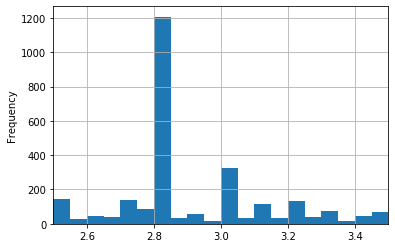

In [579]:
height_spb = data_spb_centre['ceiling_height'].describe()
print(height_spb)
data_spb_centre['ceiling_height'].plot(kind='hist', bins=20, grid=True, xlim=(2.5,3.5))

In [580]:
height = pd. DataFrame([height_spb, height_all])
height.index = ['height_spb', 'height_all']
display(height)

,count,mean,std,min,25%,50%,75%,max
height_spb,"2,681.000",2.891,0.220,2.500,2.804,2.804,3.000,3.500
height_all,"23,699.000",2.772,1.009,1.000,2.600,2.725,2.804,100.000


Средняя высота потолков у квартир так же больше в Питере.

count   2,681.000
mean        2.456
std         1.032
min         1.000
25%         2.000
50%         2.000
75%         3.000
max         5.000
Name: rooms, dtype: float64


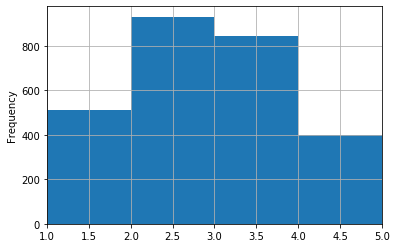

In [581]:
rooms_spb = data_spb_centre['rooms'].describe()
print(rooms_spb)
data_spb_centre['rooms'].plot(kind='hist', grid=True, xlim=(1,5), bins=4)

In [582]:
rooms = pd.DataFrame([rooms_spb, rooms_all])
rooms.index = ['rooms_spb', 'rooms_all']
display(rooms)

,count,mean,std,min,25%,50%,75%,max
rooms_spb,"2,681.000",2.456,1.032,1.000,2.000,2.000,3.000,5.000
rooms_all,"23,699.000",2.071,1.078,0.000,1.000,2.000,3.000,19.000


Количество комнат, у продаваемых в Питере квартир, так же в среднем больше.

count     2,681.000
mean    120,710.426
std      30,648.380
min      15,345.000
25%      97,616.000
50%     116,363.000
75%     140,116.000
max     210,000.000
Name: price_for_meter, dtype: float64


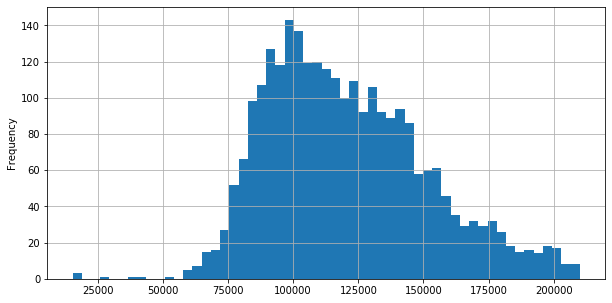

In [583]:
pfm_spb = data_spb_centre['price_for_meter'].describe()
print(pfm_spb)
data_spb_centre['price_for_meter'].plot(kind='hist', bins=55, grid=True, figsize=(10,5))

In [584]:
pfm = pd.DataFrame([pfm_spb, pfm_all])
pfm.index = ['pfm_spb', 'pfm_all']
display(pfm)

,count,mean,std,min,25%,50%,75%,max
pfm_spb,"2,681.000","120,710.426","30,648.380","15,345.000","97,616.000","116,363.000","140,116.000","210,000.000"
pfm_all,"23,699.000","99,421.210","50,306.808",111.000,"76,585.000","95,000.000","114,256.000","1,907,500.000"


Как и с другими параметрами, средняя цена за квадратный метр в центре Питера так же заметно больше, чем по всей изначальной выборке.

Перед тем, как перейти к исследованию зависимости цены за квартиру от ряда факторов, убедимся, что для квартир в центре Питера так же справедлива корреляция между ценой и общей площадью.

Корреляция для всей выборки:  0.793
Корреляция для центра Питера: 0.801


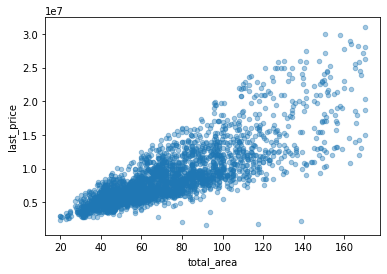

In [585]:
data_finish = data_spb_centre
data_finish.plot(x='total_area', y='last_price', kind='scatter', alpha=0.4)
print("Корреляция для всей выборки: ", corr_price_all.round(3))
print("Корреляция для центра Питера:", data_finish['last_price'].corr(data_finish['total_area']).round(3))

Корреляция между ценой и общей площадью для Питера даже больше, а это означает, что мы так же далее можем операровать не ценой за квартиру, а ценой за квадратный метр. Тем самым, получая более точные зависимости с другими параметрами.

rooms -0.303
type_floor 0.046
cityCenters_nearest 0.047


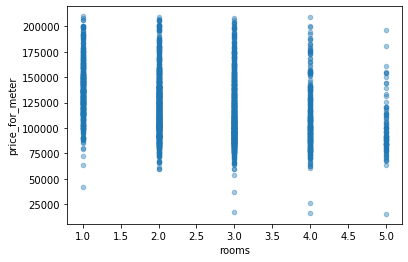

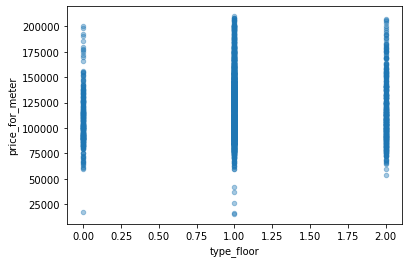

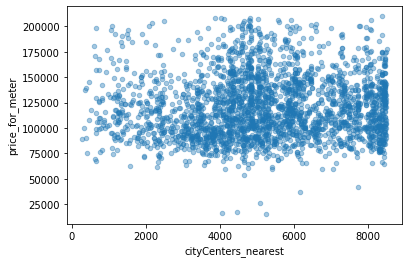

In [586]:
columns = ['rooms',
    'type_floor',
    'cityCenters_nearest']
for column in columns:
    data_finish.plot(x=column, y='price_for_meter', kind='scatter', alpha=0.4)
    print(column, data_finish['price_for_meter'].corr(data_for_price[column]).round(3))

В отличие от всей выборки, удельная цена квартир в центре Питера отрицательно коррелирует с количество комнат. В центре Питера увеличение количетсва комнат видет к уменьшению удельной цены квартиры.

Так же, в отличие от всей выборки, в центре Питера практически нет никакой зависимости от расстояния от центра. В общей выборке были несколько аномалий, в так же некоторое смещение удельной цены при удалении от центра.

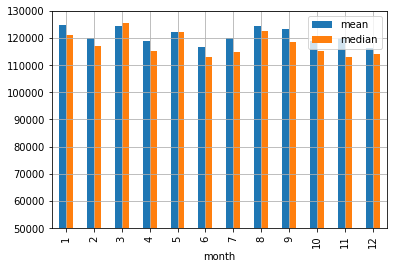

In [587]:
data_for_m = data_finish.pivot_table(index='month', values='price_for_meter', aggfunc=['mean','median'])
data_for_m.columns = ['mean', 'median']
data_for_m['mean'] = data_for_m['mean'].round(0).astype('int')
data_for_m['median'] = data_for_m['median'].round(0).astype('int')
data_for_m.plot(y=['mean', 'median'], grid=True, kind='bar', ylim=(50000, 130000))

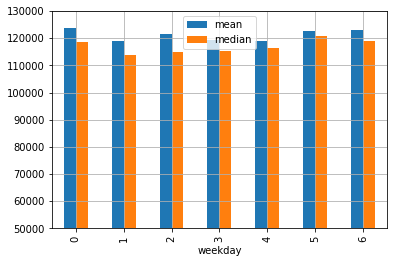

In [588]:
data_for_w = data_finish.pivot_table(index='weekday', values='price_for_meter', aggfunc=['mean','median'])
data_for_w.columns = ['mean', 'median']
data_for_w['mean'] = data_for_w['mean'].round(0).astype('int')
data_for_w['median'] = data_for_w['median'].round(0).astype('int')
data_for_w.plot(y=['mean', 'median'], grid=True, kind='bar', ylim=(50000, 130000))

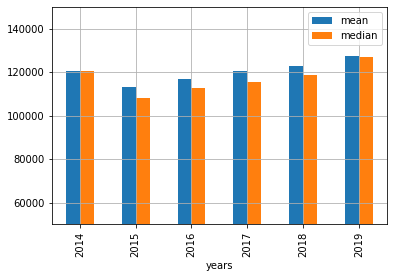

In [589]:
data_for_y = data_finish.pivot_table(index='years', values='price_for_meter', aggfunc=['mean','median'])
data_for_y.columns = ['mean', 'median']
data_for_y['mean'] = data_for_y['mean'].round(0).astype('int')
data_for_y['median'] = data_for_y['median'].round(0).astype('int')
data_for_y.plot(y=['mean', 'median'], grid=True, kind='bar', ylim=(50000, 150000))

В центре Питера так же, как и во всей выборке, удельная цена квартиры меньше, если объявление опубликовано в 5-6 месяце, и точно так же имеется спор в средней удельной цене после 2014 года.

## Общий вывод

В ходе работы, была полученна выборка объявлений о продаже квартир. В ходе предварительной обработки данных были заменены пропуски в столбцах `balcony`, `parks_around3000`, `ponds_around3000` и `is_apartment`. Так же был преобразован тип данных в столбцах: `balcony`, `last_price`, `parks_around3000`, `ponds_around3000`, `is_apartment`, `first_day_exposition`.

Далее был проведен анализ следующих параметров: `last_price`, `rooms`, `ceiling_height`, `days_exposition` и `price_for_meter`. Определн парог, после которого можно считать, что объявление о продаже высит "долго". 

После чего были проанализированны зависимости:
- цены от общей площади;
- удельной цены (цена за квадратный метр) от количества комнат;
- удельной цены от типа этажа квартиры;
- удельной цены от удаленности от центра;
- удельной цены от дня недели, месяца и года размещения объявления.

После этого была получена выборка объявлений в Санкт-Петербурге. Определена граница центра города. И получена выборка объявлений о продаже квартир в центре города.

Для этой выборке были исследованы параметры: `total_area`, `rooms`, `ceiling_height`, `price_for_meter`. А так же проанализированы зависимости удельной цена от:
- количества комнат;
- типа этажа квартиры;
- удаленности от центра;
- дня недели, месяца и года публикации объявления.